In [1]:
# Import libraries need for Linear Regression Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('titanic_train.csv')

In [3]:
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# getting Top 10 recordes in the dataset
dt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# getting Bottom 10 recordes in the dataset
dt.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
# Display the shape of the dataset
print ('The shape of the dataset is', dt.shape)

The shape of the dataset is (891, 12)


In [7]:
# Dataframe columns
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column PassengerId has [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 24

In [10]:
# To find NAN values in the dataset
dt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# as embarked column is catagorical data it has to be replace with mode
dt['Embarked'].fillna(dt['Embarked'].mode()[0], inplace=True)

In [12]:
# To find NAN values in the dataset
dt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
# Shape of the dataframe
print('The shape of new dataframe is', dt.shape)

The shape of new dataframe is (891, 12)


In [14]:
# Treating the Age column of the dataset
def impute_nan(df,var,med):
    dt[var+"_median"]=dt[var].fillna(med)
    dt[var+"_random"]=dt[var]
    ##It will have the random sample to fill the na
    random_sample=dt[var].dropna().sample(df[var].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=dt[dt[var].isnull()].index
    dt.loc[dt[var].isnull(),var+'_random']=random_sample

In [15]:
# Median of the age is calculated
med=dt.Age.median()

In [16]:
impute_nan(dt,"Age",med)

In [17]:
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,15.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.0


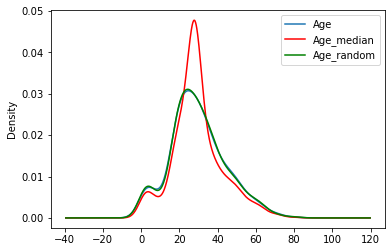

In [18]:
#Comparing Kde plot for different imputation technique
fig = plt.figure()
ax = fig.add_subplot(111)
dt['Age'].plot(kind='kde', ax=ax)
dt.Age_median.plot(kind='kde', ax=ax, color='red')
dt.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
# From the kde plots we can see that 'Age_random' meets the correct requirement so we neglect other rows
dt.drop(['Age','Age_median'], axis=1, inplace=True)

In [20]:
# Shape of the dataframe
print('The shape of new dataframe is', dt.shape)

The shape of new dataframe is (891, 12)


In [21]:
dt

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,15.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.0


In [22]:
# The Name, Ticket names,PassengerId are general and does not affect the survival
dt.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

In [23]:
dt

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random
0,0,3,male,1,0,7.2500,NaN,S,22.0
1,1,1,female,1,0,71.2833,C85,C,38.0
2,1,3,female,0,0,7.9250,NaN,S,26.0
3,1,1,female,1,0,53.1000,C123,S,35.0
4,0,3,male,0,0,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,NaN,S,27.0
887,1,1,female,0,0,30.0000,B42,S,19.0
888,0,3,female,1,2,23.4500,NaN,S,15.0
889,1,1,male,0,0,30.0000,C148,C,26.0


In [24]:
# The data analysis is done by describe function.
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Age_random,891.0,29.700348,14.563654,0.42,21.0000,28.0000,38.0,80.0000


In [25]:
# To find the correlection in the dataset
dt.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age_random
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,-0.044463
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.310630
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651,-0.208169
Parch,0.081629,0.018443,0.414838,1.000000,0.216225,-0.167231
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000,0.096466
Age_random,-0.044463,-0.310630,-0.208169,-0.167231,0.096466,1.000000


In [26]:
e=dt.corr()

<AxesSubplot:>

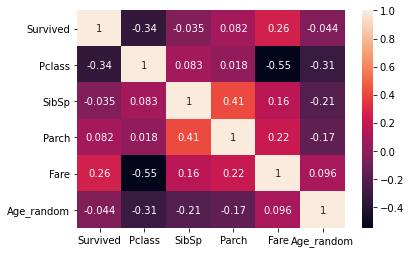

In [27]:
# Ploting the heatmap for better understanding
sns.heatmap(e,annot=True)

In [28]:
# Survived corr has been hilighted
e['Survived'].sort_values()

Pclass       -0.338481
Age_random   -0.044463
SibSp        -0.035322
Parch         0.081629
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64

In [29]:
# So all the columns includin the catagorical column are important so no columns are neglected
dt

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random
0,0,3,male,1,0,7.2500,NaN,S,22.0
1,1,1,female,1,0,71.2833,C85,C,38.0
2,1,3,female,0,0,7.9250,NaN,S,26.0
3,1,1,female,1,0,53.1000,C123,S,35.0
4,0,3,male,0,0,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,NaN,S,27.0
887,1,1,female,0,0,30.0000,B42,S,19.0
888,0,3,female,1,2,23.4500,NaN,S,15.0
889,1,1,male,0,0,30.0000,C148,C,26.0


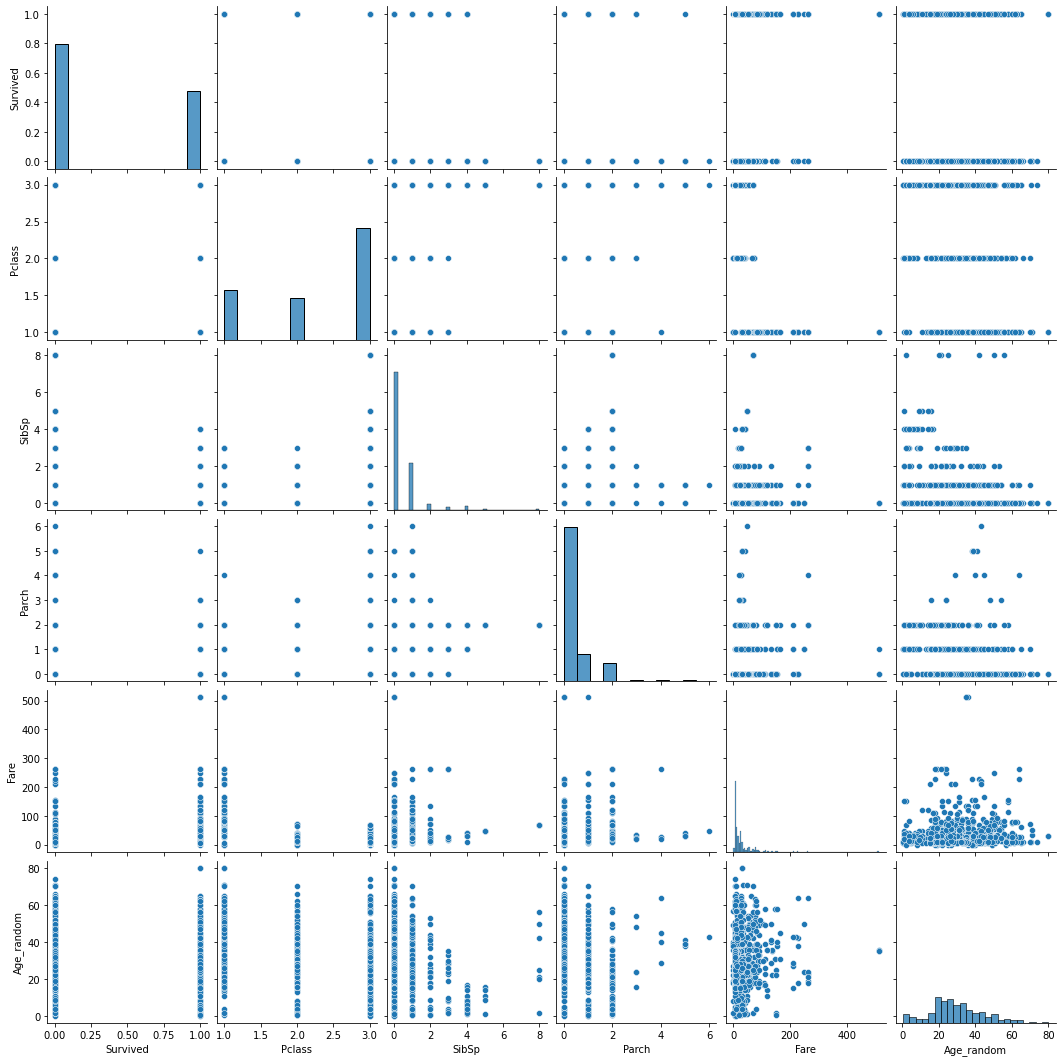

In [30]:
sns.pairplot(dt)

<AxesSubplot:xlabel='Survived', ylabel='count'>

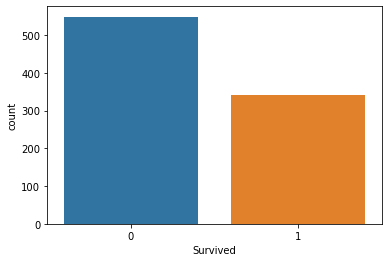

In [31]:
# Univariant Analysis
# Plotting graph for survived
sns.countplot(dt['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

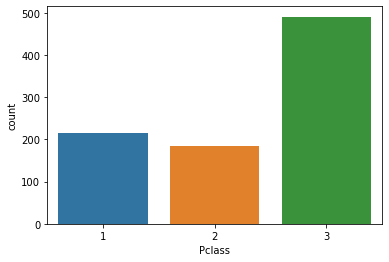

In [32]:
# Plotting graph for Pclass
sns.countplot(dt['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

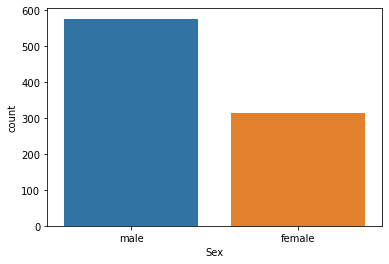

In [33]:
# Plotting graph for Sex
sns.countplot(dt['Sex'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

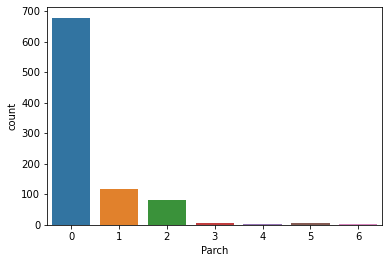

In [34]:
# Plotting graph for Sex
sns.countplot(dt['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

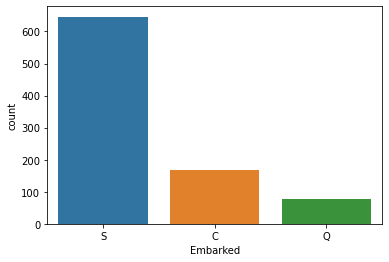

In [35]:
# Plotting graph for Embarked
sns.countplot(dt['Embarked'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

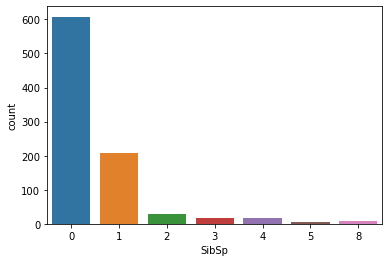

In [36]:
# Plotting graph for Embarked
sns.countplot(dt['SibSp'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

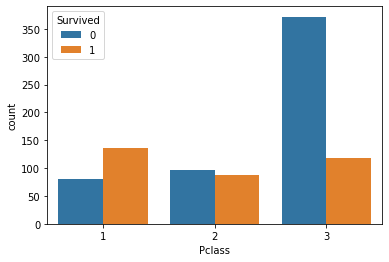

In [37]:
# Bivarient Analysis
sns.countplot(x=dt['Pclass'], hue=dt['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

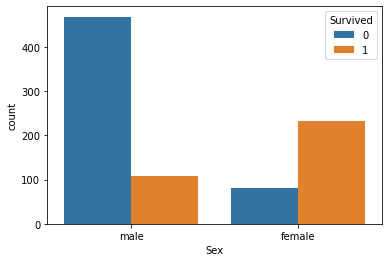

In [38]:
# Sex Vs Survived p
sns.countplot(x=dt['Sex'], hue=dt['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

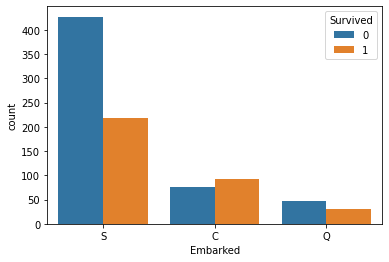

In [39]:
# Embarked Vs Survived plot
sns.countplot(x=dt['Embarked'], hue=dt['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

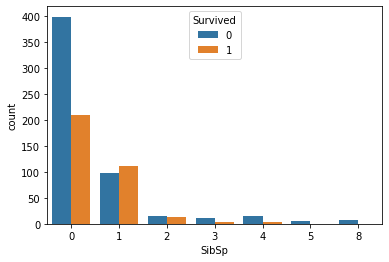

In [40]:
# Embarked Vs Survived plot
sns.countplot(x=dt['SibSp'], hue=dt['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

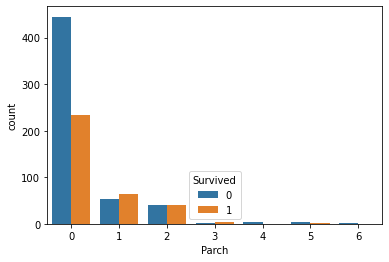

In [41]:
#Parch Vs Survived
sns.countplot(x=dt['Parch'], hue=dt['Survived'])

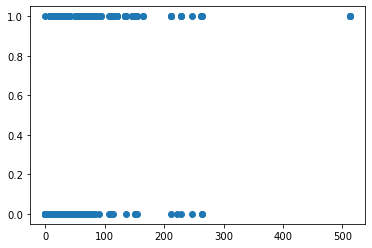

In [42]:
#Fare Vs Survived
plt.scatter(dt['Fare'],dt['Survived'])

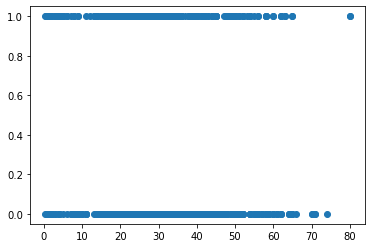

In [43]:
# Age_random Vs Survived
plt.scatter(dt['Age_random'],dt['Survived'])

<AxesSubplot:ylabel='Density'>

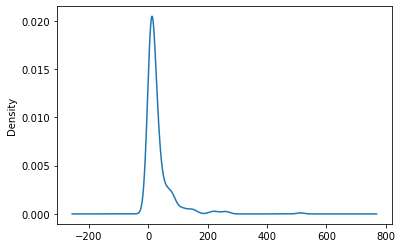

In [44]:
# Statistical analysis of contineuous data fare and age
# Distribution plots of Fare
dt['Fare'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

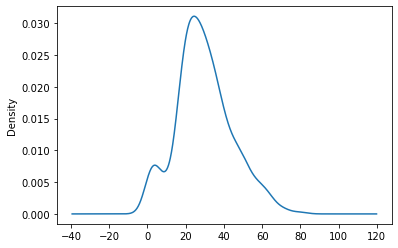

In [45]:
# Distribution plots of Age
dt['Age_random'].plot(kind='kde')

<AxesSubplot:xlabel='Fare'>

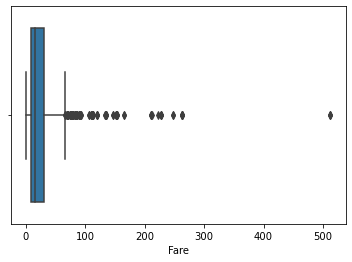

In [46]:
# Boxplot of Fare
sns.boxplot(dt['Fare'])

<AxesSubplot:xlabel='Age_random'>

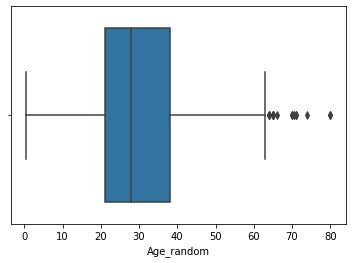

In [47]:
# Boxplot of Age_random
sns.boxplot(dt['Age_random'])

In [48]:
# To get the skewness
dt.skew()

Survived      0.478523
Pclass       -0.630548
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Age_random    0.393333
dtype: float64

In [49]:
# from the previous column we can see Age_random and Fare are taken into consideration
# the skewness should be 0.25 to -0.25
# Fare and Age can be taken into consideration as it was a true facts that tatanic tickets sold into such prices.

In [50]:
#displays the type of the data
dt.dtypes

Survived        int64
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Fare          float64
Cabin          object
Embarked       object
Age_random    float64
dtype: object

In [51]:
# Sex cabin and Embarked have object or catagorical features which have to be encoded for model prediction.
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [52]:
# Nan values are replaced with Missing
dt['Cabin'].fillna('Missing',inplace=True)

In [53]:
# Then the first digit or string is taken for consideration
dt['Cabin']=dt['Cabin'].astype(str).str[0]

In [54]:
# When we see the cabin and survived there is relation that A has most chances of survival
dt.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [55]:
# To see the columns before Encoding
dt.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Age_random'],
      dtype='object')

In [57]:
# Applying transfomers
ohe=OneHotEncoder(drop='first')
orc=OrdinalEncoder(categories=[['T', 'M', 'G', 'F', 'E', 'D', 'C', 'B', 'A']])

In [58]:
# Ordinal Encoding
dt['Cabin']=orc.fit_transform(dt['Cabin'].to_numpy().reshape(-1, 1))

In [71]:
# Get dummies to encode Sex and Embarked
t=pd.get_dummies(dt,columns=['Sex','Embarked'],drop_first=True)

In [77]:
# to check all the columns are encoded
t

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Age_random,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,1.0,22.0,1,0,1
1,1,1,1,0,71.2833,6.0,38.0,0,0,0
2,1,3,0,0,7.9250,1.0,26.0,0,0,1
3,1,1,1,0,53.1000,6.0,35.0,0,0,1
4,0,3,0,0,8.0500,1.0,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1.0,27.0,1,0,1
887,1,1,0,0,30.0000,7.0,19.0,0,0,1
888,0,3,1,2,23.4500,1.0,15.0,0,0,1
889,1,1,0,0,30.0000,6.0,26.0,1,0,0


In [83]:
# Applying machine learning models and Asigning X and y 
X=t.drop(labels='Survived',axis=1)
y=t.Survived

In [84]:
# Stansardization
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [85]:
# Importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LassoCV, RidgeCV

In [89]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7988826815642458 random_state 1
accuracy of the optimum model 0.7988826815642458 random_state 1
accuracy of the model 0.770949720670391 random_state 2
accuracy of the model 0.770949720670391 random_state 3
accuracy of the model 0.8435754189944135 random_state 4
accuracy of the optimum model 0.8435754189944135 random_state 4
accuracy of the model 0.8044692737430168 random_state 5
accuracy of the model 0.8324022346368715 random_state 6
accuracy of the model 0.7597765363128491 random_state 7
accuracy of the model 0.7262569832402235 random_state 8
accuracy of the model 0.7653631284916201 random_state 9
accuracy of the model 0.8100558659217877 random_state 10
accuracy of the model 0.8547486033519553 random_state 11
accuracy of the optimum model 0.8547486033519553 random_state 11
accuracy of the model 0.770949720670391 random_state 12
accuracy of the model 0.8100558659217877 random_state 13
accuracy of the model 0.7988826815642458 random_state 14
accuracy of the model

In [98]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8715083798882681 in random state 1403


In [99]:
# Substituting for optimal values
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=1403)

In [100]:
# Appying Logistic regression
l=LogisticRegression()
l.fit(x_train, y_train)
pred=l.predict(x_test)
acc=accuracy_score(y_test,pred)

In [101]:
# Finding the accuracy to compare
acc

0.8715083798882681

In [102]:
# Confusion matrix to see type1 and type2 errors
confusion_matrix(y_test,pred)

array([[100,  10],
       [ 13,  56]], dtype=int64)

In [104]:
# Classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       110
           1       0.85      0.81      0.83        69

    accuracy                           0.87       179
   macro avg       0.87      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



In [105]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [118]:
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=49)
    De=DecisionTreeClassifier()
    De.fit(x_train, y_train)
    pred=De.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc)

accuracy of the model 0.8379888268156425


In [109]:
# Exgboost classifier
from xgboost import XGBClassifier

In [122]:
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    XB=XGBClassifier()
    XB.fit(x_train, y_train)
    pred=XB.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc)

[12:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.8044692737430168


In [112]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [125]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7653631284916201 random_state 1
accuracy of the optimum model 0.7653631284916201 random_state 1
accuracy of the model 0.7988826815642458 random_state 2
accuracy of the optimum model 0.7988826815642458 random_state 2
accuracy of the model 0.7932960893854749 random_state 3
accuracy of the model 0.8435754189944135 random_state 4
accuracy of the optimum model 0.8435754189944135 random_state 4
accuracy of the model 0.8379888268156425 random_state 5
accuracy of the model 0.8100558659217877 random_state 6
accuracy of the model 0.7988826815642458 random_state 7
accuracy of the model 0.7653631284916201 random_state 8
accuracy of the model 0.7821229050279329 random_state 9
accuracy of the model 0.8379888268156425 random_state 10
accuracy of the model 0.8491620111731844 random_state 11
accuracy of the optimum model 0.8491620111731844 random_state 11
accuracy of the model 0.7821229050279329 random_state 12
accuracy of the model 0.8435754189944135 random_state 13
accuracy of

In [137]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9050279329608939 in random state 1579


In [138]:
# Substituting for optimal values
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=1579)

In [139]:
# Appying Random Classifier
rf.fit(x_train, y_train)
pred=rf.predict(x_test)
acc1=accuracy_score(y_test,pred)
print ('Optimum accuracy is obtaned in', acc1)

Optimum accuracy is obtaned in 0.9050279329608939


In [140]:
# Confusion matrix to see type1 and type2 errors
confusion_matrix(y_test,pred)

array([[106,   8],
       [  9,  56]], dtype=int64)

In [141]:
# Classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       114
           1       0.88      0.86      0.87        65

    accuracy                           0.91       179
   macro avg       0.90      0.90      0.90       179
weighted avg       0.90      0.91      0.90       179



In [163]:
#hyperparameter tuning
params= {'n_estimators':[13,20],'criterion': ["gini", "entropy"],'max_depth' :[10,15], 'min_samples_split':[10,11],
         'min_samples_split' :[5,7]}

In [164]:
# Hyperparameter tuning of GridSearch
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(rf,param_grid=params)
g.fit(x_train,y_train)
print('The best parameters are ', g.best_params_)

The best parameters are  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 13}


In [185]:
# Equating optimal parameters
rf=RandomForestClassifier(criterion='gini', max_depth=15, min_samples_split=7, n_estimators=15)

In [186]:
#  Fitting the model with optimal model
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=7, n_estimators=15)

In [187]:
# Accuracy after tuning
pred1=rf.predict(x_test)
acc2=accuracy_score(y_test,pred1)
print ('Optimum accuracy is obtaned in', acc2)

Optimum accuracy is obtaned in 0.9050279329608939
